# 1.0 Introduction and Imports

## 1.1 Introduction

This assignment is inspired by: 

- https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
- https://www.kaggle.com/code/dansbecker/xgboost/notebook

In this assignment we will apply XGBoost Regression techniques to predict house prices, based on the famous Kaggle Dataset https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Step 1 is to download the dataset.

## 1.2 Imports

In [106]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import xgboost as xgb
import joblib
from modules.preprocessing import (
    filter_quantitative_columns
    ,set_working_directory
    ,extract_column_descriptions
    ,print_column_descriptions
    ,add_columns_to_dataframe
    ,drop_columns_from_list
    ,perform_anova
    ,ordinal_hierarchy
    ,ordinal_hierarchy_enforce
    ,quant_cols_dtypes
    ,one_hot_encoding
    ,check_negative_values
    ,replace_zeros_with_nan
    ,replace_values_based_on_another_column
    ,missing_columns_from_dataframes
    ,convert_int64_to_float64
    ,remove_outliers
    ,data_clean
    )

#=========================================================================
# Set the directory
#=========================================================================
set_working_directory()

In [2]:
# Set Automatic reloading of imports and from ... imports
%load_ext autoreload
%autoreload 2

In [3]:
# =========================================================================
# read in the data
# =========================================================================
train_data = pd.read_csv(r'data/train.csv',index_col=0)
test_data  = pd.read_csv(r'data/test.csv',index_col=0)

### <center style="background-color:Gainsboro; width:60%;">Feature selection</center>
The purpose of feature selection, as the name suggests, is to only model the most pertinent and important features, thus reducing the computational overhead, and also to alleviate the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). The following are a number of notebooks covering techniques to achieve said goal, all of which use the House Prices data as an example:

* [Feature selection using the Boruta-SHAP package](https://www.kaggle.com/carlmcbrideellis/feature-selection-using-the-boruta-shap-package)
* [Recursive Feature Elimination (RFE) example](https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example)
* [House Prices: Permutation Importance example](https://www.kaggle.com/carlmcbrideellis/house-prices-permutation-importance-example)
* [Feature importance using the LASSO](https://www.kaggle.com/carlmcbrideellis/feature-importance-using-the-lasso)

In this assignment, we shall use all of the numerical columns, and ignore the categorical features. To encode the categorical features one can use for example [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 

Our first task is to do Feature Exploration and Selection. 

# 2.0 Feature Exploration

## 2.1 Quantitative Columns

#### Identify Columns and confirm none excluded
    Confirmed, no quantitative columns improperly excluded and categorical numeric identifier column removed

In [107]:
# Run Function from preprocessing module 
quantitative_columns_df, qualitative_columns = filter_quantitative_columns(train_data)

# Print Ommitted Columns and descriptions
print_column_descriptions(qualitative_columns)

MSZoning: Identifies the general zoning classification of the sale. 
 A	Agriculture 
 C	Commercial 
 FV	Floating Village Residential 
 I	Industrial 
 RH	Residential High Density 
 RL	Residential Low Density 
 RP	Residential Low Density Park 
 RM	Residential Medium Density

Street: Type of road access to property 
 Grvl	Gravel 
 Pave	Paved

Alley: Type of alley access to property 
 Grvl	Gravel 
 Pave	Paved 
 NA 	No alley access

LotShape: General shape of property 
 Reg	Regular 
 IR1	Slightly irregular 
 IR2	Moderately Irregular 
 IR3	Irregular

LandContour: Flatness of the property 
 Lvl	Near Flat/Level 
 Bnk	Banked - Quick and significant rise from street grade to building 
 HLS	Hillside - Significant slope from side to side 
 Low	Depression

Utilities: Type of utilities available 
 AllPub	All public Utilities (E,G,W,& S) 
 NoSewr	Electricity, Gas, and Water (Septic Tank) 
 NoSeWa	Electricity and Gas Only 
 ELO	Electricity only

LotConfig: Lot configuration 
 Inside	Inside lot 
 Corne

In [5]:
# retrieve column descriptions
output_quant = extract_column_descriptions(list(quantitative_columns_df.columns))

# Isolate Ordinal-Hierarchal Columns to confirm for removal
ordinal_cols_description_dict = {key: value for key, value in output_quant.items() if '\n' in value}

# Print descriptions
print_column_descriptions(list(ordinal_cols_description_dict))

MSSubClass: Identifies the type of dwelling involved in the sale. 
 20	1-STORY 1946 & NEWER ALL STYLES 
 30	1-STORY 1945 & OLDER 
 40	1-STORY W/FINISHED ATTIC ALL AGES 
 45	1-1/2 STORY - UNFINISHED ALL AGES 
 50	1-1/2 STORY FINISHED ALL AGES 
 60	2-STORY 1946 & NEWER 
 70	2-STORY 1945 & OLDER 
 75	2-1/2 STORY ALL AGES 
 80	SPLIT OR MULTI-LEVEL 
 85	SPLIT FOYER 
 90	DUPLEX - ALL STYLES AND AGES 
 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER 
 150	1-1/2 STORY PUD - ALL AGES 
 160	2-STORY PUD - 1946 & NEWER 
 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER 
 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

OverallQual: Rates the overall material and finish of the house 
 10	Very Excellent 
 9	Excellent 
 8	Very Good 
 7	Good 
 6	Above Average 
 5	Average 
 4	Below Average 
 3	Fair 
 2	Poor 
 1	Very Poor

OverallCond: Rates the overall condition of the house 
 10	Very Excellent 
 9	Excellent 
 8	Very Good 
 7	Good 
 6	Above Average 
 5	Average 
 4	Below Average 
 3	Fair 
 2	Poor 
 1

#### Store Columns and Dtypes Function

In [6]:
quant_cols_dtypes(quantitative_columns_df)

#### Confirm if any quant columns have negative numbers

In [ ]:
# Get columns names with negative values
quant_no_neg_df = check_negative_values(quantitative_columns_df)

#### Declare Columns (User Input)


In [7]:
# Columns to remove based on previous descriptions above
drop_quant_cols_list = ['MSSubClass']
# Save data to a file using joblib
joblib.dump(drop_quant_cols_list, 'modules/joblib_preprocessing/drop_quant_cols_list.joblib')

# Quantitative Columns to add (not ordinal) based on previous descriptions above
add_quant_cols_list = []
# Save data to a file using joblib
joblib.dump(add_quant_cols_list, 'modules/joblib_preprocessing/add_quant_cols_list.joblib')

['modules/joblib_preprocessing/add_quant_cols_list.joblib']

#### Apply Drop/Add Columns functions

In [8]:
# Apply the functions
quant_drop_df = drop_columns_from_list(quant_no_neg_df, drop_quant_cols_list)
quant_add_df = add_columns_to_dataframe(train_data, quant_no_neg_df, add_quant_cols_list)

## 2.2 Ordinal Columns
#### Declare Columns (User Input)

In [9]:
# Provide columns not part of the quantitative columns to obtain ordinal data from
ordinal_cols_to_transform_list = [           
    ['PoolQC', {
        'NA': '0',
        'Fa': '1',
        'TA': '2',
        'Gd': '3',
        'Ex': '4'}]
    ,['GarageQual', {
        'NA': '0',
        'Po': '1',
        'Fa': '2',
        'TA': '3',
        'Gd': '4',
        'Ex': '5'}]
    ,['GarageCond', {
        'NA': '0',
        'Po': '1',
        'Fa': '2',
        'TA': '3',
        'Gd': '4',
        'Ex': '5'}]
    ,['KitchenQual', {
        'NA': '0',
        'Fa': '1',
        'TA': '2',
        'Gd': '3',
        'Ex': '4'}]
    ,['HeatingQC', {
        'NA': '0',
        'Fa': '1',
        'TA': '2',
        'Gd': '3',
        'Ex': '4'}]
    ,['BsmtCond', {
        'NA': '0',
        'Po': '1',
        'Fa': '2',
        'TA': '3',
        'Gd': '4',
        'Ex': '5'}]
    ,['BsmtQual', {
        'NA': '0',
        'Po': '1',
        'Fa': '2',
        'TA': '3',
        'Gd': '4',
        'Ex': '5'}]
    ,['ExterCond', {
        'Po': '1',
        'Fa': '2',
        'TA': '3',
        'Gd': '4',
        'Ex': '5'}]
    ,['ExterQual', {
        'Po': '1',
        'Fa': '2',
        'TA': '3',
        'Gd': '4',
        'Ex': '5'}]
    ,['Fence', {
        'NA': '0',
        'MnWw': '1',
        'GdWo': '2',
        'MnPrv': '3',
        'GdPrv': '4'}]
    # This is not ordinal, but replaces true and false with 0 and 1
    ,['CentralAir',{
        'Y': '1',
        'y': '1',
        'N': '0',
        'n': '0'}]
]
# Save data to a file using joblib
joblib.dump(ordinal_cols_to_transform_list, 'modules/joblib_preprocessing/ordinal_cols_to_transform_list.joblib')

# Specify ordinal columns to clean
ordinal_quant_columns_to_coerce = [
    ["OverallQual",{
        'low': 1, 
        'high': 10}],
    ["OverallCond",{
        'low': 1, 
        'high': 10}]
]

# Save data to a file using joblib
joblib.dump(ordinal_quant_columns_to_coerce, 'modules/joblib_preprocessing/ordinal_quant_columns_to_coerce.joblib')


['modules/joblib_preprocessing/ordinal_quant_columns_to_coerce.joblib']

#### Apply Ordinal Transformation functions

In [10]:
ordinal_trans_df = ordinal_hierarchy(train_data, quant_add_df, ordinal_cols_to_transform_list)
quant_df = ordinal_hierarchy_enforce(ordinal_trans_df, ordinal_quant_columns_to_coerce)

## 2.3 One-Hot Encoding


#### Identify statistically significant categories

In [113]:
# taking the qualitative categories, perform ANOVA
perform_anova(train_data, 'SalePrice', qualitative_columns)


ExterCond: 
    Passed the ANOVA p-value significance check, 
    Passed the homogeneity of variances check (Levene's Test), 
    Normality test (Shapiro-Wilk test for residuals) for each category within ExterCond are:
TA: NO, residuals are not normally distributed (1282 values)
Gd: NO, residuals are not normally distributed (146 values)
Fa: YES, residuals are normally distributed (28 values)
Po: NA, normality cannot be calculated (has less than 3 values)
Ex: YES, residuals are normally distributed (3 values)

LotConfig: 
    Passed the ANOVA p-value significance check, 
    Passed the homogeneity of variances check (Levene's Test), 
    Normality test (Shapiro-Wilk test for residuals) for each category within LotConfig are:
Inside: NO, residuals are not normally distributed (1052 values)
FR2: NO, residuals are not normally distributed (47 values)
Corner: NO, residuals are not normally distributed (263 values)
CulDSac: NO, residuals are not normally distributed (94 values)
FR3: YES, re

    Therefore, there are no qualitative columns in this dataset with values that vary significantly.  

In [114]:
from scipy.stats import ttest_ind

def perform_t_test(df, predictor_column, qualitative_columns, category_values):
    
    for category_column in qualitative_columns:
         
        for category in category_values:
            category_data = df[predictor_column][df[category_column] == category]
            if 
            ttest_ind(category_data, df[predictor_column]).pvalue
            print(f'T-Test for {category}: {ttest_ind(category_data, df[predictor_column]).pvalue}')


    perform_t_test(train_data, 'SalePrice', column, train_data[column].unique())

T-Test for TA: 0.02921062767281185
T-Test for Fa: 7.224793328405117e-07
T-Test for Gd: 0.10148595839398249
T-Test for nan: nan
T-Test for Ex: 0.1925677598657892
T-Test for Po: 0.07864770077543194
T-Test for Gtl: 0.7452091974502161
T-Test for Mod: 0.11926997450963012
T-Test for Sev: 0.28971830321372455
T-Test for Gd: 1.1969755602031846e-34
T-Test for TA: 3.560641349209206e-36
T-Test for Ex: 2.9995195240289567e-55
T-Test for Fa: 1.3246016141413432e-05
T-Test for nan: nan
T-Test for MnPrv: 1.0830282821505761e-06
T-Test for GdWo: 0.00020785893527828483
T-Test for GdPrv: 0.8487203942446728
T-Test for MnWw: 0.05187081651413594
T-Test for Reg: 4.177584930995696e-07
T-Test for IR1: 3.782162116767403e-09
T-Test for IR2: 3.65280134953491e-06
T-Test for IR3: 0.1639234750452634
T-Test for 2Story: 4.8863701419527573e-11
T-Test for 1Story: 0.16719328956896062
T-Test for 1.5Fin: 9.802786306686038e-09
T-Test for 1.5Unf: 0.0008859065147506568
T-Test for SFoyer: 0.00047378447031934374
T-Test for SLvl: 0

#### Declare Columns (User Input)

In [11]:
columns_to_encode = [
                    'Street'
                    'BldgType', 
                    "HouseStyle"
                    "Utilities", 
                    ]
# Save data to a file using joblib
joblib.dump(columns_to_encode, 'modules/joblib_preprocessing/columns_to_encode.joblib')

#### Apply encoding function

In [ ]:
one_hot_encoding(quant_df, columns_to_encode)

## 2.4 Identify columns to convert values to np.NaN
    Conclusion: Data Transformed

### 2.4.1 Zeros to np.NaN
    All columns with the unit of square feet and the column MiscVal were transformed

#### Identify Columns

In [12]:
# Filter columns with zero as the minimum value
zero_min_cols_df = quant_no_neg_df[quant_no_neg_df.columns[quant_no_neg_df.min() == 0]]

# Print descriptions of columns with zero as the minimum value
print_column_descriptions(list(zero_min_cols_df.columns))

MasVnrArea: Masonry veneer area in square feet

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

CentralAir: Central air conditioning 
 N	No 
 Y	Yes

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Fireplaces: Number of fireplaces

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

MiscVal: $Value of miscellaneous feature



#### Declare Columns(User Input)

In [13]:
# Retrieve Descriptions zero_min_cols
output_zeros = extract_column_descriptions(list(zero_min_cols_df.columns))

# Store list 
zeros_to_nan_col_list = []

# filter for columns in the unit of square feet
for key, value in output_zeros.items():
    if "feet" in value:
        zeros_to_nan_col_list.append(key)
        
# Additional column (MiscVal) to transform
zeros_to_nan_col_list.append('MiscVal')

# Save data to a file using joblib
joblib.dump(zeros_to_nan_col_list, 'modules/joblib_preprocessing/zeros_to_nan_col_list.joblib')


['modules/joblib_preprocessing/zeros_to_nan_col_list.joblib']

#### Apply Transformation

In [14]:
# Call and store the result from the replace_zeros_with_nan function from preprocessing modules
quant_0_df, sq_ft_col_list_func_changes = replace_zeros_with_nan(quant_df, zeros_to_nan_col_list)

# Print descriptions
print_column_descriptions(zeros_to_nan_col_list)

# Print changes
print(sq_ft_col_list_func_changes)

MasVnrArea: Masonry veneer area in square feet

BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GarageArea: Size of garage in square feet

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

MiscVal: $Value of miscellaneous feature

      column name  original min value  new min value
0      MasVnrArea                 0.0            1.0
1      BsmtFinSF1                 0.0            2.0
2      BsmtFinSF2                 0.0           28.0
3       BsmtUnfSF                 0.0           14.0
4     TotalBsmtSF                 0.0          10

### 2.4.2 Identify and Convert other columns that should have np.NaN

#### Identify Columns

In [15]:
# Print descriptions
print_column_descriptions(list(quant_0_df.columns))

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

OverallQual: Rates the overall material and finish of the house 
 10	Very Excellent 
 9	Excellent 
 8	Very Good 
 7	Good 
 6	Above Average 
 5	Average 
 4	Below Average 
 3	Fair 
 2	Poor 
 1	Very Poor

OverallCond: Rates the overall condition of the house 
 10	Very Excellent 
 9	Excellent 
 8	Very Good 
 7	Good 
 6	Above Average 
 5	Average 
 4	Below Average 
 3	Fair 
 2	Poor 
 1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
 Ex	Excellent 
 Gd	Good 
 TA	Average/Typical 
 Fa	Fair 
 Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior 
 Ex	Excellent 
 Gd	Good 
 TA	Average/Typical 
 Fa	Fair 
 Po	Poor

BsmtQual: Evaluates the height of the basement 
 Ex	Excellent (100+

#### Declare Columns(User Input)

In [16]:
# Define Columns to transform based on other columns
df_cols_to_trans_nan = pd.DataFrame(
    data=[
        ("MasVnrArea", "MasVnrType", None),
        ("BsmtFinSF1", "BsmtFinType1", "NA"),
        ("BsmtFinType2", "BsmtFinType2", "NA"),
        ("Fireplaces", "FireplaceQu", "NA"),
        ("GarageYrBlt", "GarageType", "NA"),
        ("GarageCars", "GarageType", "NA"),
        ("GarageArea", "GarageType", "NA"),
        ("MiscVal", "MiscFeature", "NA")
    ],
    columns=["quant_col_to_trans", "qual_col_ref", "qual_col_and_val_dict"]
)

# Save data to a file using joblib
joblib.dump(df_cols_to_trans_nan, 'modules/joblib_preprocessing/df_cols_to_trans_nan.joblib')


['modules/joblib_preprocessing/df_cols_to_trans_nan.joblib']

#### Apply Transformation

In [17]:
# Replace values based on the rules defined in df_cols_to_trans_nan calling the preprocessing module
quant_nan_clean_df, _ = replace_values_based_on_another_column(train_data, quant_0_df, df_cols_to_trans_nan)

## 2.5 Outliers

### Identify Columns
    Based on the visualizations, the columns 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd' will not have outliers removed as that data is desired.


In [18]:
# Run the function to generate visualizations
# plot_subplots_for_columns(quant_nan_clean_df)

### Declare Columns (User input)

In [19]:
# List columns that should not have outliers removed based on IQR (determined by visualization)
cols_not_to_remove_outliers = ['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']

# Append Ordinal Columns
for item in ordinal_cols_to_transform_list:
    cols_not_to_remove_outliers.append(item[0])
for item in ordinal_quant_columns_to_coerce:
    cols_not_to_remove_outliers.append(item[0])

# Save data to a file using joblib
joblib.dump(cols_not_to_remove_outliers, 'modules/joblib_preprocessing/cols_not_to_remove_outliers.joblib')

['modules/joblib_preprocessing/cols_not_to_remove_outliers.joblib']

### Apply Transformation

In [76]:
# Call and store the result from the remove_outliers function from preprocessing modules
train_data_clean, outliers_removed = remove_outliers(quant_nan_clean_df, cols_not_to_remove_outliers)
print(outliers_removed)

      column_name num_outliers_removed
0     LotFrontage                   88
1         LotArea                   69
2       YearBuilt                    7
3      MasVnrArea                   28
4      BsmtFinSF1                   13
5      BsmtFinSF2                    3
6       BsmtUnfSF                   30
7     TotalBsmtSF                   24
8        1stFlrSF                   20
9        2ndFlrSF                   19
10      GrLivArea                   31
11   BsmtFullBath                    1
12     Fireplaces                    5
13     GarageCars                    5
14     GarageArea                   46
15     WoodDeckSF                   32
16    OpenPorchSF                   43
17  EnclosedPorch                    2
18      3SsnPorch                    2
19    ScreenPorch                    6
20        MiscVal                    8
21      SalePrice                   61


## 2.6 Removal of Null Values
    This is impractical considering almost every remaining record has a null value.  As they are all np.NaNs instead of None or NA values, the model will take these columns with the NaN values.  The records where y is np.NaN will be removed.

In [32]:
train_data_clean_na_y_drop = train_data_clean.dropna(subset=['SalePrice'])

## Perform Transformations on new data

In [33]:
test_data_clean = data_clean(test_data)

Number of outliers removed from LotFrontage: 100
Number of outliers removed from LotArea: 60
Number of outliers removed from YearBuilt: 2
Number of outliers removed from MasVnrArea: 34
Number of outliers removed from BsmtFinSF1: 14
Number of outliers removed from BsmtFinSF2: 2
Number of outliers removed from BsmtUnfSF: 26
Number of outliers removed from TotalBsmtSF: 20
Number of outliers removed from 1stFlrSF: 23
Number of outliers removed from 2ndFlrSF: 14
Number of outliers removed from LowQualFinSF: 1
Number of outliers removed from GrLivArea: 44
Number of outliers removed from BsmtFullBath: 1
Number of outliers removed from Fireplaces: 7
Number of outliers removed from GarageYrBlt: 1
Number of outliers removed from GarageCars: 12
Number of outliers removed from GarageArea: 34
Number of outliers removed from WoodDeckSF: 38
Number of outliers removed from OpenPorchSF: 48
Number of outliers removed from EnclosedPorch: 6
Number of outliers removed from 3SsnPorch: 1
Number of outliers r

In [37]:
# Identify column mismatch, if any
missing_columns_list = missing_columns_from_dataframes(train_data_clean_na_y_drop, test_data_clean)
print(missing_columns_list)
# Printed output should only be the y column if not present in test data

['SalePrice']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1113 non-null   float64
 1   LotArea        1391 non-null   float64
 2   YearBuilt      1453 non-null   float64
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     563 non-null    float64
 5   BsmtFinSF1     980 non-null    float64
 6   BsmtFinSF2     164 non-null    float64
 7   BsmtUnfSF      1312 non-null   float64
 8   TotalBsmtSF    1399 non-null   float64
 9   1stFlrSF       1440 non-null   float64
 10  2ndFlrSF       612 non-null    float64
 11  LowQualFinSF   26 non-null     float64
 12  GrLivArea      1429 non-null   float64
 13  BsmtFullBath   1459 non-null   float64
 14  Fireplaces     1455 non-null   float64
 15  GarageYrBlt    1379 non-null   float64
 16  GarageCars     1455 non-null   float64
 17  GarageArea     1333 non-null   float64

In [41]:
# Convert datatypes to matching numeric types
train_data_clean_check, test_data_clean_check = convert_int64_to_float64(
    train_data_clean_na_y_drop, test_data_clean
)
train_data_clean_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1060 non-null   float64
 1   LotArea        1339 non-null   float64
 2   YearBuilt      1392 non-null   float64
 3   YearRemodAdd   1399 non-null   int64  
 4   MasVnrArea     528 non-null    float64
 5   BsmtFinSF1     939 non-null    float64
 6   BsmtFinSF2     161 non-null    float64
 7   BsmtUnfSF      1261 non-null   float64
 8   TotalBsmtSF    1353 non-null   float64
 9   1stFlrSF       1387 non-null   float64
 10  2ndFlrSF       590 non-null    float64
 11  LowQualFinSF   25 non-null     float64
 12  GrLivArea      1383 non-null   float64
 13  BsmtFullBath   1398 non-null   float64
 14  Fireplaces     1396 non-null   float64
 15  GarageYrBlt    1318 non-null   float64
 16  GarageCars     1394 non-null   float64
 17  GarageArea     1285 non-null   float64
 18  WoodDeckSF   

In [42]:
# Save the training and test dataframes to joblib

joblib.dump({'columns':test_data_clean_check.columns.tolist(), "data": test_data_clean_check}, 'modules/joblib_preprocessing/test_data_clean.joblib')
joblib.dump({'columns':train_data_clean_check.columns.tolist(), "data": train_data_clean_check}, 'modules/joblib_preprocessing/train_data_clean.joblib')

['modules/joblib_preprocessing/train_data_clean.joblib']

In [140]:
from sklearn.model_selection import train_test_split

# LBecause the test data does not have the predictor variable, I'll be using part of the train data as the test data
train_data_clean = joblib.load('modules/joblib_preprocessing/train_data_clean.joblib')

# Convert dict values to dataframes
train_data_clean = pd.DataFrame(columns=train_data_clean['columns'], data=train_data_clean['data'])

# Isolate y from x predictors
y = train_data_clean['SalePrice']
X = train_data_clean.drop(columns='SalePrice')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


['modules/joblib_preprocessing/y_test.joblib']

### <center style="background-color:Gainsboro; width:60%;">Feature engineering</center>
As mentioned, one aspect of feature engineering is the creation of new features out of existing features. A simple example would be to create a new feature which is the sum of the number of bathrooms in the house:

In [141]:
import matplotlib.pyplot as plt
import math

def scatter_plots(df, series):
    # Get the list of column names excluding the specified series
    other_columns = df.columns.tolist()
    
    # Calculate the number of rows and columns for the subplots
    num_plots = len(other_columns)
    num_rows = math.ceil(num_plots / 4)
    num_cols = min(num_plots, 4)
    
    # Create the subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))
    
    # Flatten the axes array if there is only one row
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Iterate over the other columns and create scatter plots
    for i, col in enumerate(other_columns):
        row = i // num_cols
        coln = i % num_cols
        ax = axes[row, coln]
        # Align the data based on common index
        aligned_data = pd.concat([series, df[col]], axis=1, join='inner')
        
        ax.scatter(aligned_data[series.name], aligned_data[col])
        ax.set_xlabel(series.name)
        ax.set_ylabel(col)
        ax.set_title(f'{col} vs {series.name}')
    
    # Remove any unused subplots
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])
    
    # Adjust the spacing between subplots
    fig.tight_layout()
    
    # Show the plots
    plt.show()

In [142]:
for df in (X_train, X_test):
    df["n_bathrooms"] = df["BsmtFullBath"] + (df["BsmtHalfBath"]*0.5) + df["FullBath"] + (df["HalfBath"]*0.5)
    df["area_with_basement"]  = df["GrLivArea"] + df["TotalBsmtSF"]
    df['YearBuiltdiffYrSold'] = df["YrSold"] - df['YearBuilt']
    df['YearRemodAdddiffYrSold'] = df["YrSold"] - df['YearRemodAdd'] 
    df['GarageYrBltdiffYrSold'] = df["YrSold"] - df['GarageYrBlt']
    
# Combine the columns to plot into a single list
columns_to_plot = [
    ["n_bathrooms", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"],
    ["area_with_basement","GrLivArea","TotalBsmtSF"],
    ["YearBuiltdiffYrSold", "YearBuilt"],
    ["YearRemodAdddiffYrSold", "YearRemodAdd"],
    ["GarageYrBltdiffYrSold", "GarageYrBlt"]
]

# Plot the scatter plots
# for columns in columns_to_plot:
#     scatter_plots(X_train[columns], y_train)

In [143]:
# Save the changes
joblib.dump({'columns':X_train.columns.tolist(), "data": X_train}, 'modules/joblib_preprocessing/X_train.joblib')
joblib.dump({'columns':X_test.columns.tolist(), "data": X_test}, 'modules/joblib_preprocessing/X_test.joblib')
joblib.dump({'columns':y_train.name, "data": y_train}, 'modules/joblib_preprocessing/y_train.joblib')
joblib.dump({'columns':y_test.name, "data": y_test}, 'modules/joblib_preprocessing/y_test.joblib')

['modules/joblib_preprocessing/y_test.joblib']

For more on this fascinating aspect may I recommend the free on-line book ["*Feature Engineering and Selection: A Practical Approach for Predictive Models*"](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson.
### <center style="background-color:Gainsboro; width:60%;">XGBoost estimator</center>
Note that for this competition we use the RMSLE evaluation metric, rather than the default metric, which for regression is the RMSE. For more on the peculiarities of the RMSLE see the Appendix below.

In [122]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

Can you use grid search to find the optimal hyper parameters?

In [128]:
from sklearn.metrics import make_scorer

# As Sci Kit learn does not have an RMSLE scorer, I have created one.
def rmsle_scorer(y_true, y_pred, **kwargs):
    """Callable scorer similar to xgboost rmsle"""
    rmsle = np.sqrt( # Root
                    np.mean( # Mean
                    np.square(# Square
                        np.log1p(y_pred) - np.log1p(y_true)))) # Error of the log
    return rmsle

rmsle_score = make_scorer(rmsle_scorer, greater_is_better=True, needs_threshold=False)

In [129]:
# Define Search
search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring=rmsle_score, cv=3, verbose=2)

# Fit to training
search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=600; total time=   2.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=600; total time=   2.4s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=600; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=700; total time=   5.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   5.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   5.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmsle', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=Non...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.015], 'max_depth': [4, 5],
                         'n_estimators': [500, 600, 700]},
             scoring=make_scorer(rmsle_scorer), verbose=2)

In [144]:
print("The best hyperparameters are ",search.best_params_)

joblib.dump(search.best_params_, 'modules/joblib_preprocessing/best_params.joblib')

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


['modules/joblib_preprocessing/best_params.joblib']

Now, can you setup a XGBoost Regressor object using your hyperparameters and fit it?

In [145]:
best_params = joblib.load('modules/joblib_preprocessing/best_params.joblib')

# Redefine Regressor
regressor=xgb.XGBRegressor(eval_metric='rmsle', 
                           learning_rate = best_params['learning_rate'],
                           max_depth = best_params['max_depth'],
                           n_estimators = best_params['n_estimators'])
xgbmodel = regressor.fit(X_train, y_train)

Finally, can you run it on your test set?

In [147]:
xgbmodel_test_predictions = regressor.predict(X_test)

In [148]:
test_data_predicted = X_test.copy()
test_data_predicted['SalesPrice'] = xgbmodel_test_predictions


In [ ]:
# Can you score your solution offline and see how it does?
joblib.dump(test_data_predicted, 'modules/joblib_preprocessing/test_predicted.joblib')

In [156]:
# read in the ground truth file
y_true = joblib.load('modules/joblib_preprocessing/y_test.joblib')
y_true = pd.Series(data=y_true['data'], name=y_true['columns'])

from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_true, test_data_predicted['SalesPrice']) )
print("The score is %.5f" % RMSLE )

The score is 0.14257


Finally, use the below block to prepare your submission

In [158]:
output = pd.DataFrame({"Id":X_test.index, "SalePrice": test_data_predicted['SalesPrice']})
output.to_csv('data/submission.csv', index=False)

### <center style="background-color:Gainsboro; width:60%;">Feature importance</center>
Let us also take a very quick look at the feature importance too:

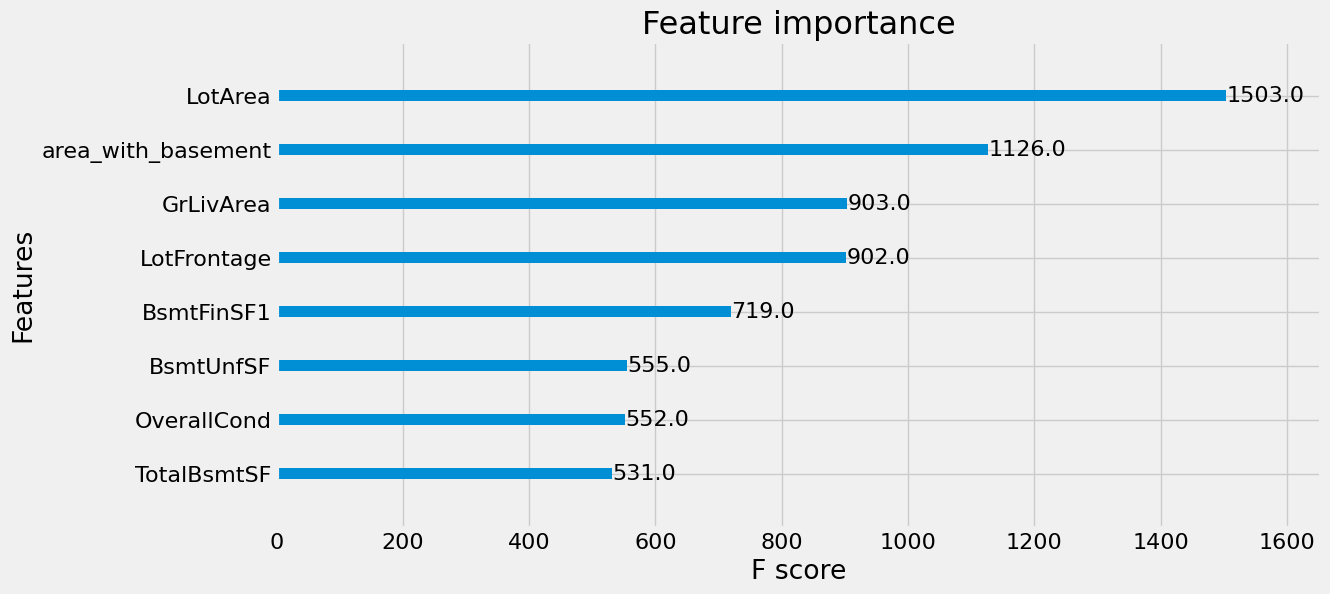

In [169]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show();

Where here the `F score` is a measure "*...based on the number of times a variable is selected for splitting, weighted by the squared improvement to the model as a result of each split, and averaged over all trees*." [1] 

Note that these importances are susceptible to small changes in the training data, and it is much better to make use of ["GPU accelerated SHAP values"](https://www.kaggle.com/carlmcbrideellis/gpu-accelerated-shap-values-jane-street-example), incorporated with version 1.3 of XGBoost.

Can you follow the above guide use SHAP values instead of F Score?

In [177]:
# !pip install shap --no-build-isolation
!conda install -c conda-forge shap

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import shap
n_trees = 500
dmat = xgb.DMatrix(X_train, y_train)
bst  = xgb.train({'tree_method': 'hist', "device": "cuda"}, dmat)

# Make sure GPU prediction is enabled
bst.set_param({"predictor": "gpu_predictor"})
shap_values = bst.predict(dmat, pred_contribs=True)
# and plot
shap.summary_plot(shap_values[:,:-1], X_train)

In [ ]:
# Compute the shap interactions
shap_interactions = bst.predict(dmat, pred_interactions=True)


# and plot
shap.summary_plot(shap_interactions[:,:-1,:-1], X_train)

### <center style="background-color:Gainsboro; width:60%;">Appendix: The RMSLE evaluation metric</center>
From the competition [evaluation page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) we see that the metric we are using is the root mean squared logarithmic error (RMSLE), which is given by

$$ {\mathrm {RMSLE}}\,(y, \hat y) = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2} $$

where $\hat{y}_i$ is the predicted value of the target for instance $i$, and $y_i$
is the actual value of the target for instance $i$.

It is important to note that, unlike the RMSE, the RMSLE is asymmetric; penalizing much more the underestimated predictions than the overestimated predictions. For example, say the correct value is $y_i = 1000$, then underestimating by 600 is almost twice as bad as overestimating by 600:

In [160]:
def RSLE(y_hat,y):
    return np.sqrt((np.log1p(y_hat) - np.log1p(y))**2)

print("The RMSLE score is %.3f" % RSLE( 400,1000) )
print("The RMSLE score is %.3f" % RSLE(1600,1000) )

The RMSLE score is 0.915
The RMSLE score is 0.470


The asymmetry arises because 

$$ \log (1 + \hat{y}_i) - \log (1 + y_i) =  \log \left( \frac{1 + \hat{y}_i}{1 + y_i} \right) $$

so we are essentially looking at ratios, rather than differences such as is the case of the RMSE. We can see the form that this asymmetry takes in the following plot, again using 1000 as our ground truth value:

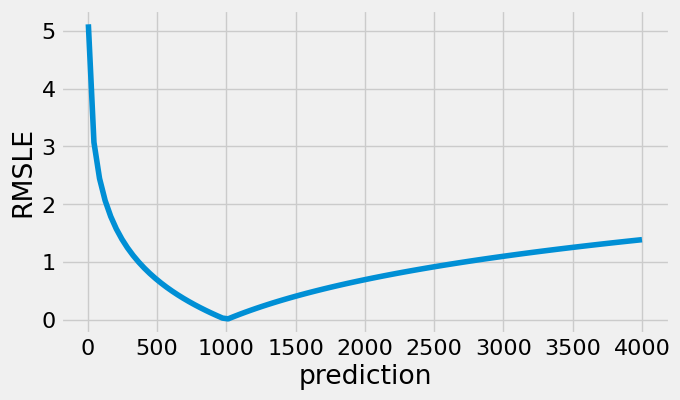

In [161]:
plt.rcParams["figure.figsize"] = (7, 4)
x = np.linspace(5,4000,100)
plt.plot(x, RSLE(x,1000))
plt.xlabel('prediction')
plt.ylabel('RMSLE')
plt.show()